In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def markov_pi(delta):
    
    msd = np.zeros(Nloop)
    pi_calc = np.zeros(Nloop)
    rej = np.zeros(Nloop)
    
    for j in xrange(0,Nloop):
        n_hits=0                  # cember içinde kalan noktalar
        x=1                       # baslangıc noktası x koord.
        y=1                       # baslangıc noktası y koord.
        red = 0                   # kac atısın reddedildigi
      
        for i in range(1, n):     # ornekleme yapılıyor.
            del_x = random.uniform(-delta,delta)
            del_y = random.uniform(-delta,delta)
            if abs( x + del_x ) < 1 and abs( y + del_y ) < 1:
                x += del_x
                y += del_y
            
            if abs( x + del_x ) > 1 or abs( y + del_y ) > 1:
                red += 1       

            if ( x*x+y*y ) < 1:
                n_hits += 1
        
        rej[j] = red
        pi_calc[j] = 4.0*n_hits/n
        msd[j]=pow((1.0*n_hits / n - math.pi/4),2)
    
    return np.mean(pi_calc),np.mean(msd), np.mean(rej)

In [3]:
n=5000000
Nmax=31
Nloop=25

msd = np.zeros(Nmax-1)
rej = np.zeros(Nmax-1)
res = np.zeros(Nmax-1)

for i in range(1,Nmax):
   k=0.1*i
   res[i-1], msd[i-1], rej[i-1]= markov_pi(k)
   print "\nFOR DELTA=", k
   print "  Calculated pi=", res[i-1]
   print "  Real value of pi=", math.pi
   rej[i-1] = 1.0*rej[i-1]/n 
   print "  Reject=", rej[i-1]
   print "  Mean_square_dev=", msd[i-1] 



FOR DELTA= 0.1
  Calculated pi= 3.141352384
  Real value of pi= 3.14159265359
  Reject= 0.097474128
  Mean_square_dev= 2.24453606702e-06

FOR DELTA= 0.2
  Calculated pi= 3.14071856
  Real value of pi= 3.14159265359
  Reject= 0.190073584
  Mean_square_dev= 7.42540472032e-07

FOR DELTA= 0.3
  Calculated pi= 3.14079664
  Real value of pi= 3.14159265359
  Reject= 0.277581648
  Mean_square_dev= 2.27130665796e-07

FOR DELTA= 0.4
  Calculated pi= 3.141269376
  Real value of pi= 3.14159265359
  Reject= 0.360040272
  Mean_square_dev= 1.79843949468e-07

FOR DELTA= 0.5
  Calculated pi= 3.141641952
  Real value of pi= 3.14159265359
  Reject= 0.43746852
  Mean_square_dev= 1.00111304084e-07

FOR DELTA= 0.6
  Calculated pi= 3.14207744
  Real value of pi= 3.14159265359
  Reject= 0.509905096
  Mean_square_dev= 1.4211385807e-07

FOR DELTA= 0.7
  Calculated pi= 3.141571616
  Real value of pi= 3.14159265359
  Reject= 0.577420712
  Mean_square_dev= 1.02803325646e-07

FOR DELTA= 0.8
  Calculated pi= 3.1419

In [4]:
print msd 
print rej 
print res

[  2.24453607e-06   7.42540472e-07   2.27130666e-07   1.79843949e-07
   1.00111304e-07   1.42113858e-07   1.02803326e-07   1.75795754e-07
   1.74470156e-07   9.63276268e-08   1.08615183e-07   1.64733645e-07
   2.23334147e-07   9.56765561e-08   1.55545805e-07   1.52841435e-07
   1.88894428e-07   1.63430169e-07   1.58294167e-07   2.39583817e-07
   3.46012669e-07   2.38840970e-07   2.73518576e-07   5.46402341e-07
   4.37552878e-07   4.38366057e-07   6.20540425e-07   5.42428488e-07
   6.87735504e-07   7.77717867e-07]
[ 0.09747413  0.19007358  0.27758165  0.36004027  0.43746852  0.5099051
  0.57742071  0.64000473  0.69751161  0.7500428   0.79341826  0.82636561
  0.85206111  0.87241009  0.88889894  0.9023038   0.91349074  0.92283476
  0.93073669  0.93751173  0.94327645  0.94835382  0.95273345  0.95656561
  0.95999983  0.96301425  0.96571893  0.96811586  0.9703079   0.97220959]
[ 3.14135238  3.14071856  3.14079664  3.14126938  3.14164195  3.14207744
  3.14157162  3.14191142  3.14143146  3.141

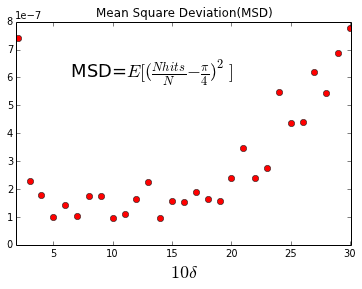

In [13]:
plt.figure(1)
plt.plot(range(2,Nmax),msd[1:], 'ro')
plt.xlabel(r'$10\delta$',fontsize=18)
plt.title('Mean Square Deviation(MSD)',fontsize=12)  
plt.text(6, .0000006, r' MSD=$ E[(\frac{Nhits}{N} -\frac{\pi}{4})^2]$',fontsize=18)
plt.xlim(1.9,30.1)
#plt.tick_params(axis='', labelsize=30)
savefig('mean_square_deviation_Markov_sampling.png')

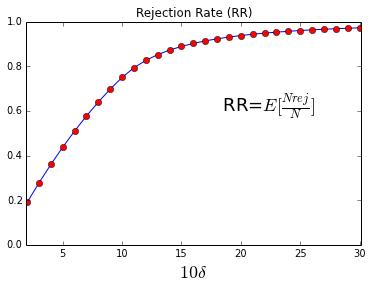

In [14]:
plt.plot(range(1,Nmax),rej)
plt.plot(range(1,Nmax),rej,'ro')
plt.xlabel(r'$10\delta$',fontsize=18)
plt.title('Rejection Rate (RR)',fontsize=12)  
plt.xlim(1.9,30.1)
plt.text(18, .6, r' RR=$ E[\frac{Nrej}{N}]$',fontsize=18)
savefig('rejection_rate_Markov_sampling.png')

In [11]:
print res

[ 3.14135238  3.14071856  3.14079664  3.14126938  3.14164195  3.14207744
  3.14157162  3.14191142  3.14143146  3.14141786  3.14115405  3.14210486
  3.14152966  3.14134685  3.14216371  3.14114509  3.14193043  3.14221533
  3.14184307  3.14210589  3.14223699  3.14199904  3.14124397  3.14246672
  3.14116205  3.14158307  3.14252323  3.14312086  3.14189872  3.14142634]
